# Simple Texture Filtering

The postporcessing file contains a rudimentary implementation of image postprocessing.
We currently only support postpro for *RGBA* images.

In [1]:
import sys
import os

import matplotlib.pyplot as plt

ROOT_DIR = os.path.abspath('..')
sys.path.insert(0, ROOT_DIR)

import numpy as np

from pygl import get_offscreen_context
from pygl import postprocessing

from samples.images import lena
from utils import display_images

No EGL found!


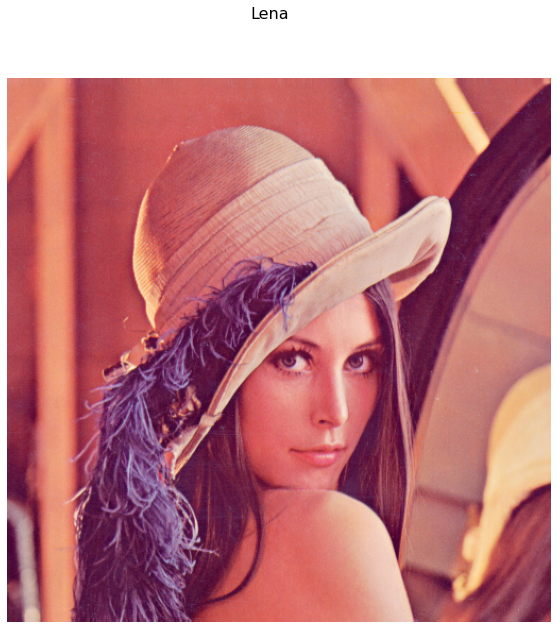

In [2]:
ctx = get_offscreen_context()
image = lena()
display_images(image, "Lena")

To create a filter that depends only on the pixel value itself. You need to define the filter kernel function with the signature *vec4* ***apply*** *(vec4 in_color)*.

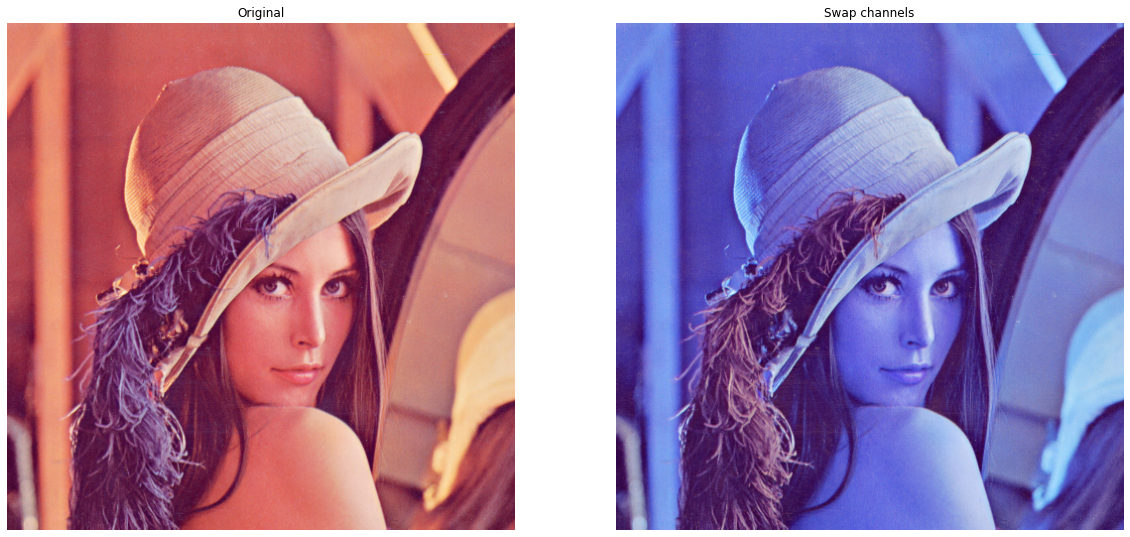

In [3]:
swap_channels = """vec4 apply(vec4 color) { return color.bgra; }"""
filter = postprocessing.Filter(swap_channels, pixel_local=True)

result = filter.apply(image)

display_images([image, result], titles=["Original", "Swap channels"])

If you want to create a filter using multiple pixels you need to define the filter kernel function with the signature *vec4* ***apply*** *(ivec2 pixel)*. You can access the input image using the *texture_in* variable.

You may pass kernel uniforms either during filter initialization or override when calling *filter.apply*.

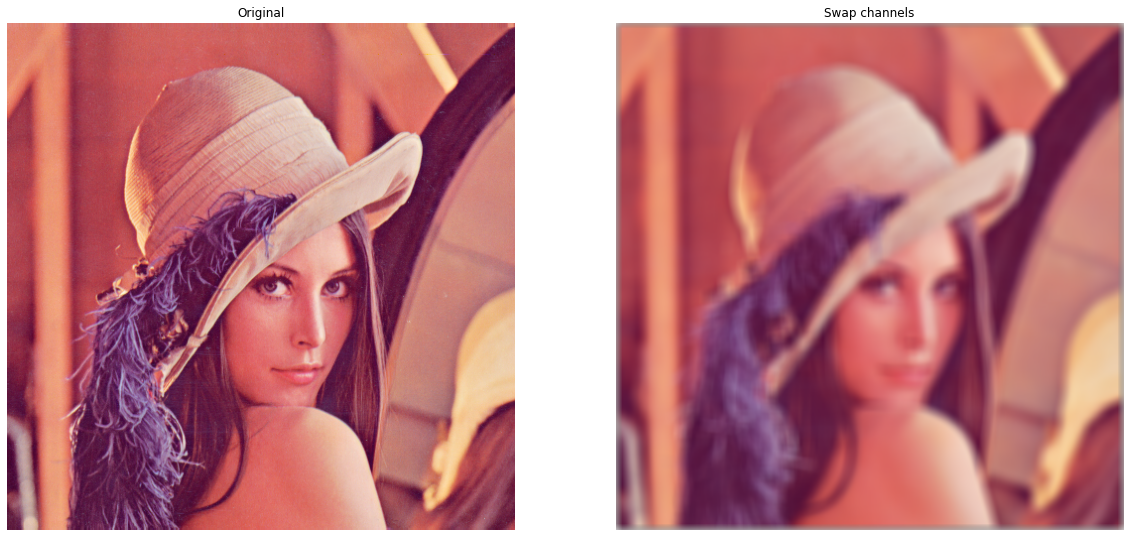

In [5]:
avg_filter_src = """
uniform int kernel_size;

vec4 apply(ivec2 pixel) {
    vec4 color = vec4(0.0);
    for (int i = -kernel_size/2; i <= kernel_size/2; i++) {
        for (int j = -kernel_size/2; j <= kernel_size/2; j++) {
            ivec2 coo = ivec2(pixel.x + i, pixel.y + j);
            color += texelFetch(texture_in, coo, 0);
        }
    }
    return color / float(kernel_size * kernel_size);
}
"""

avg_filter = postprocessing.Filter(avg_filter_src, pixel_local=False) 
result = avg_filter.apply(image, kernel_size=13)
display_images([image, result], titles=["Original", "Swap channels"])